## Homework 4, problem 8.2
Write a function [Q,R] = mgs(A) (see next lecture) that computes a reduced QR factorization 
$ A = \hat{Q}\hat{R} $  of an $m \times n$ matrix $A$ with $m \ge n$ using modified Gram-Schmidt orthogonalization. 
The output variables are a matrix $Q \in \mathbb{C}^{m \times n}$ with orthonormal columns and a triangular matrix $R \in \mathbb{C}^{n \times n}.$

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import time

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

In [2]:
# Define the QR function for the REAL matrix A with full rank
def mgs(A):
    # set dimension of $A$
    m,n = A.shape
    
    # Initialize Q,R
    V = np.zeros((m,n))
    Q = np.zeros((m,n))
    R = np.zeros((n,n))
    
    for kk in range(n): 
        V[:,kk]=A[:,kk]
    for ii in range(n):
        R[ii,ii]= np.linalg.norm(V[:,ii],2)            
        Q[:,ii]=V[:,ii]/R[ii,ii]
        for jj in range(ii+1,n):
            R[ii,jj] = Q[:,ii].T@V[:,jj]
            V[:,jj] =V[:,jj] -R[ii,jj]*Q[:,ii]
    return(Q,R)

# Test the QR function

### Visualize the error in the QR algorithm by plotting a heatmap of 
$$\big|QR-A\big|.$$

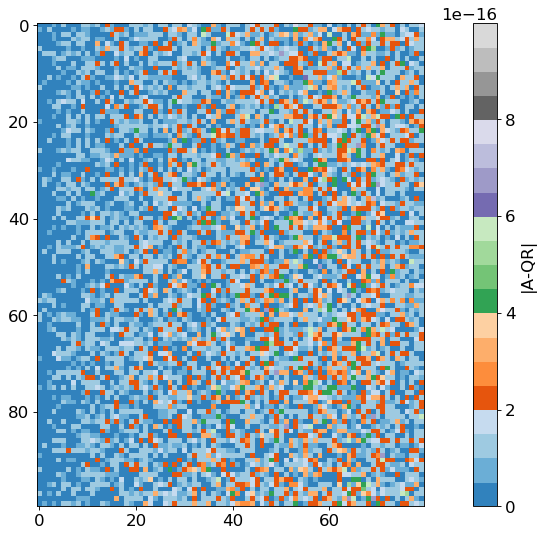

In [3]:
# Define the dimensions of $ A $, must have $ m \ge n $
m , n = 100, 80 
A = np.random.rand(m,n)
Q,R = mgs(A)
plt.imshow(np.abs(Q@R-A),cmap='tab20c')
plt.colorbar(label='|A-QR|')
plt.legend()
plt.show()

## Visualize how the QR algorithm error scales with dimension.
### Procedure:
* Get a random square matrix A of size n
* Use mgs to find QR decomposition
* For each n, do this multiple times
* Do this for dimension n ranging from 1,1000 

In [9]:
# define the dimensions we're testing over
nTests = [5,10,50,100,500,1000]
# define the number of trials per n dimension
nIter = 20

# Set up run time
QR_runtime = np.zeros((nIter,len(nTests)))
# Set up QR error results
QR_Err = np.zeros((nIter,len(nTests)))
# Set up Q^*Q=I error results
QTQ_Err = np.zeros((nIter,len(nTests)))

for jj,n in enumerate(nTests):
    for kk in range(nIter):
        A = np.random.rand(n,n)
        tic = time.time()
        Q,R = mgs(A)
        QR_runtime[kk,jj] = time.time()-tic
        QR_Err[kk,jj]=np.linalg.norm(Q@R-A)
        QTQ_Err[kk,jj]=np.linalg.norm(Q.T@Q-np.identity(n))
    print('\n Dimension: ',n)
    print('Mean QR error: ',np.mean(QR_Err[:,jj]))
    print('Mean $Q^*Q=I$ error: ',np.mean(QTQ_Err[:,jj]))


 Dimension:  5
Mean QR error:  1.85456368309e-16
Mean $Q^*Q=I$ error:  8.30554079499e-15

 Dimension:  10
Mean QR error:  5.5208731167e-16
Mean $Q^*Q=I$ error:  5.95351568136e-15

 Dimension:  50
Mean QR error:  6.48859297952e-15
Mean $Q^*Q=I$ error:  1.2947441888e-13

 Dimension:  100
Mean QR error:  1.851864495e-14
Mean $Q^*Q=I$ error:  3.06316101171e-13

 Dimension:  500
Mean QR error:  1.75926100994e-13
Mean $Q^*Q=I$ error:  1.52025704253e-12

 Dimension:  1000
Mean QR error:  4.09318882553e-13
Mean $Q^*Q=I$ error:  1.10403384494e-11


### Plot the QR errors against the dimension

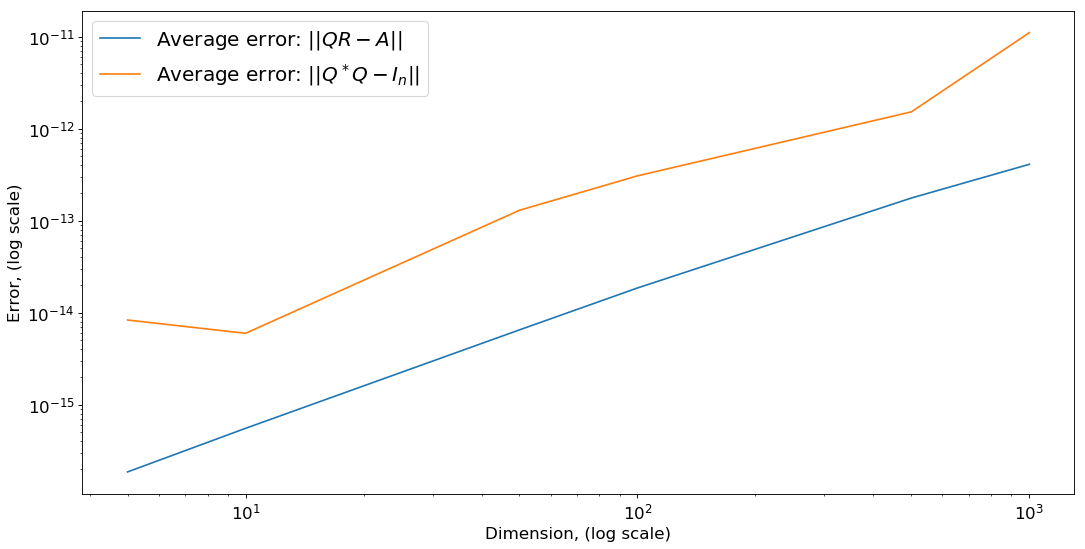

In [10]:
plt.plot(nTests, np.mean(QR_Err,axis=0),label='Average error: $||QR-A||$')
plt.plot(nTests, np.mean(QTQ_Err,axis=0),label='Average error: $||Q^*Q-I_n||$')
plt.xlabel('Dimension, (log scale)')
plt.ylabel('Error, (log scale)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

### Plot the computation time against the dimension

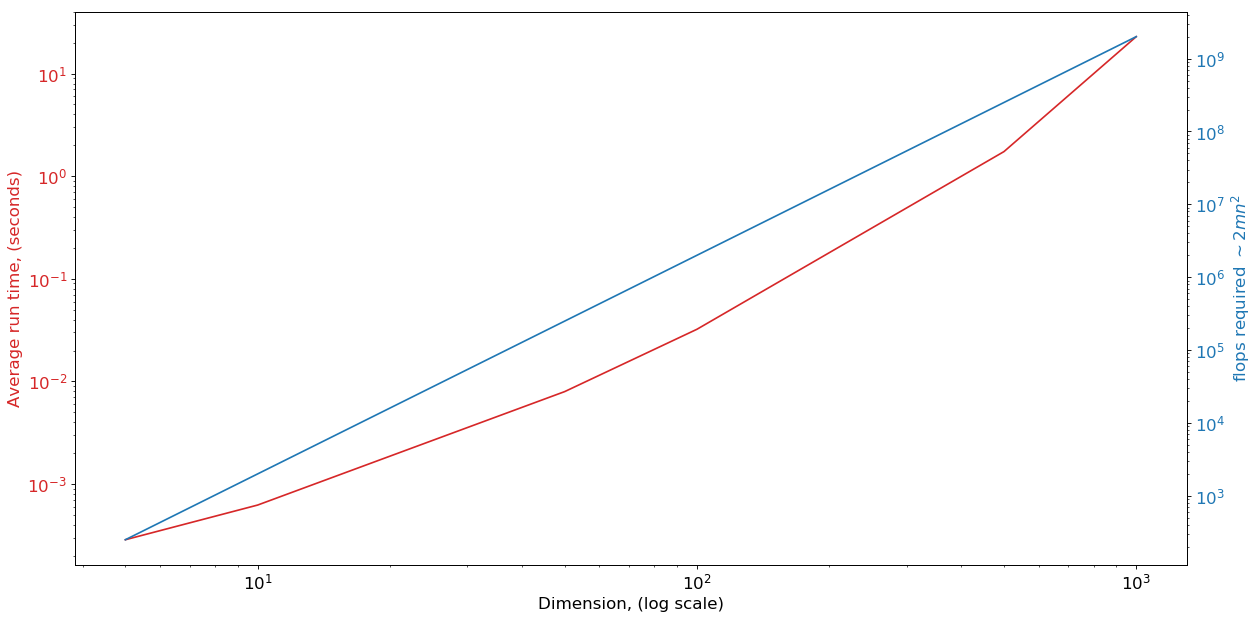

In [22]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Dimension, (log scale)')
ax1.set_ylabel('Average run time, (seconds)', color=color)
ax1.plot(nTests, np.mean(QR_runtime,axis=0), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_yscale('log')

ax2.set_ylabel('flops required $\sim 2mn^2$', color='tab:blue')  # we already handled the x-label with ax1
ax2.plot(nTests, 2*np.array(nTests)**3, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()